## Workshop 6

Importing libraries bs4, csv, requests, pandas, time and warnings.
bs4 - Used to extract data from html and xml files.
csv - To perform operation on csv files
requests - Used to send HTTP request and receive a response.
Pandas - Used to analyse data.
time - Used to get time in the real world and to perform various tasks on it.

In [1]:
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
time.sleep(2)
import warnings
warnings.filterwarnings('ignore')

Creating lists to store url of the movies.
The below variables url1, url2, url3, url4, and url5 contains the review page url for the movies WALLÂ·E, Bratz, King Richard (2021), Paan Singh Tomar, and The Grapes of Wrath respectively. The empty list named urls is created too.

In [2]:
urls = []
url1 = 'https://www.imdb.com/title/tt0910970/reviews/?ref_=tt_ql_urv'
url2 = 'https://www.imdb.com/title/tt0804452/reviews/?ref_=tt_ql_urv'
url3 = 'https://www.imdb.com/title/tt9620288/reviews/?ref_=tt_ql_urv'
url4 = 'https://www.imdb.com/title/tt1620933/reviews/?ref_=tt_ql_urv'
url5 = 'https://www.imdb.com/title/tt0032551/reviews/?ref_=tt_ql_urv'

**Appending all variables to the empty list.**

In [3]:
urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)

Creating an empty list content. Extracting all the reviews from the url provided. It looks after element 'div' with attribute class having value 'review-container', and extracts text from it. It appends the review comment to the list content.

In [4]:
content = []
for url in urls:
    page = requests.get(url, timeout=2.50)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    content.append(soup.find_all('div', class_= 'review-container'))

In [5]:
print(content)

[[<div class="review-container">
<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>7</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw2033804/"> Wow, do I feel out of step!
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur2467618/">MartinHafer</a></span><span class="review-date">7 March 2009</span>
</div>
<span class="spoiler-warning">Warning: Spoilers</span>
<div class="ipl-expander">
<div class="ipl-expander__container">
<div class="expander-icon-wrapper spoiler-warning__control">
<svg class="ipl-expander__icon expander-i

Creating an empty dataframe named movie with columns Reviews and Rating.

In [6]:
movie = pd.DataFrame(columns=['Review','Rating'])

The below code first creates an empty lists review and rating. We are searching element 'a' with attribute class having value 'title' for review. Additionally, we are searching element 'span' for ratings. Review and rating are then copied to dataframe movie.

In [7]:
review = []
rating = []
count = 0
for cc in content:
    for c in cc: 
        count+= 1 
 
        print('\nMovie review ', count)
        #Get review.
        str = c.find_all('a', attrs={'class':'title'}) 
        rReview =''
        for s in str:
            #print('Review is: ',s.get_text())
            rReview = s.get_text()
 
        #Get rating.
        ratings = c.find_all('span', attrs={'class':''})
        rVal = []
        for r in ratings:
            str1 = r.get_text().strip()
            rVal.append(str1)
 
        val = rVal[0]
        if(len(val) > 2):
            continue 
        else:
            review.append(rReview)
            rating.append(val)
            print('Review: ', rReview)
            print('Rating: ',val) 
 
movie['Review'] = review
movie['Rating'] = rating


Movie review  1
Review:   Wow, do I feel out of step!

Rating:  7

Movie review  2
Review:   Simply amazing!

Rating:  9

Movie review  3

Movie review  4
Review:   PIXAR does it again

Rating:  9

Movie review  5
Review:   Thoughtful and Kind

Rating:  9

Movie review  6

Movie review  7
Review:   Eve of love

Rating:  6

Movie review  8
Review:   Wonderful Message

Rating:  10

Movie review  9

Movie review  10
Review:   They did it again

Rating:  10

Movie review  11
Review:   "I don't want to survive. I want to live."

Rating:  7

Movie review  12
Review:   Idiocracy as utopia

Rating:  6

Movie review  13
Review:   The Silent, Ecological Pixar Film

Rating:  8

Movie review  14
Review:   wall·e

Rating:  8

Movie review  15
Review:   Absolutely Stunning B-D Visuals & Audio

Rating:  9

Movie review  16
Review:   Another classic from Pixar

Rating:  10

Movie review  17
Review:   ILike

Rating:  9

Movie review  18
Review:   Jam-packed with plot and viewer-friendly ecology-minde

Printing first 5 rows of a dataframe 'movie'.

In [8]:
movie.head()

,Review,Rating
0,"Wow, do I feel out of step!\n",7
1,Simply amazing!\n,9
2,PIXAR does it again\n,9
3,Thoughtful and Kind\n,9
4,Eve of love\n,6


In [9]:
movie.shape

(111, 2)

Copying movie dataframe to csv file.

In [10]:
movie.to_csv('SubasThapa-2128468.csv', index=False)

## Text Processing and Analysis

In [11]:
import string
import re
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


Copying all the raw reviews of all 5 movies.

In [12]:
textFeatures = movie['Review'].copy()
textFeatures.shape
print(textFeatures)

0                          Wow, do I feel out of step!\n
1                                      Simply amazing!\n
2                                  PIXAR does it again\n
3                                  Thoughtful and Kind\n
4                                          Eve of love\n
                             ...                        
106                               Highway 66 Revisited\n
107     The most important word you'll ever hear : Fa...
108     Desperate people struggle to survive desperat...
109     The Greatest Film Ever Made Until Citizen Kan...
110     "...I'll be there." (Tom Joad)......"We'll go...
Name: Review, Length: 111, dtype: object


In [13]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
 text.append(t)
all_text = ', '.join(t for t in text)
print(all_text)
print(len(all_text))

 Wow, do I feel out of step!
,  Simply amazing!
,  PIXAR does it again
,  Thoughtful and Kind
,  Eve of love
,  Wonderful Message
,  They did it again
,  "I don't want to survive. I want to live."
,  Idiocracy as utopia
,  The Silent, Ecological Pixar Film
,  wall·e
,  Absolutely Stunning B-D Visuals & Audio
,  Another classic from Pixar
,  ILike
,  Jam-packed with plot and viewer-friendly ecology-minded messages...perhaps too jammed
,  adorable and haunting, delightful, joyous, and ultimately funny
,  Lovely
,  Futuristic fantasy of robot love.
,  One For The Ages
,  This film is quite good if you are looking for a DVD for a relatively dumb and very undemanding teen or pre-teen. Otherwise, you couldn't help but do better.
,  Lots of brat-itude but no style or substance
,  thoughts from a grown man about a movie based upon dolls who've spent 100 hours a week at the mall
,  Bitter.
,  Smarter than your average doll, which is saying a great deal for this film
,  From The Director Of Cas

In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Stopwords are the words such as 'I', 'we', 'they' etc which doesn't have particular meaning. These words are considered as noise. These stopwords needs to be removed to reduce noise. The below step will lists all the stopwords and we are adding extra stopwords to the set. The below code will exclude stopwords and create a wordcloud from the remaining words.

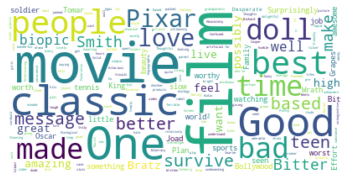

In [15]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats", "upon", "Singh", "Irrfan", "Man", "will", "khan", "U", "DVD", "Paan", "wall-e", "cos"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
wordcloud.to_file("wordcloud_cb_all.png")

In [16]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\subas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The below code will go through all the review comments and check whether the review is positive, negative or neutral.

In [17]:
sid = SentimentIntensityAnalyzer()
c = 0
for t in text:
    c+=1
    print(c, t)
    ss = sid.polarity_scores(t)
    print(ss)
 
    if(ss['compound'] >= 0.05):
        print('positive')
    elif(ss['compound'] <= -0.05):
        print('negative')
    else:
        print('neutral')
    print('\n')


1  Wow, do I feel out of step!

{'neg': 0.0, 'neu': 0.55, 'pos': 0.45, 'compound': 0.6239}
positive


2  Simply amazing!

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6239}
positive


3  PIXAR does it again

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


4  Thoughtful and Kind

{'neg': 0.0, 'neu': 0.143, 'pos': 0.857, 'compound': 0.7184}
positive


5  Eve of love

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
positive


6  Wonderful Message

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
positive


7  They did it again

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


8  "I don't want to survive. I want to live."

{'neg': 0.289, 'neu': 0.711, 'pos': 0.0, 'compound': -0.1139}
negative


9  Idiocracy as utopia

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


10  The Silent, Ecological Pixar Film

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


11  wall·e

{'neg': 0.0, 'neu': 1.0, 'pos':

## Sentiment Classification using Machine Learning

Categorizing ratings into positive, negative, and neutral based on the ratings provided by users.

In [18]:
label = []
for r in movie['Rating']:
    r = int(r)
    if (r>5):
        label.append('1') #Positive
    elif(r<5):
        label.append('-1') #Negative
    elif(r==5):
        label.append('0') #Netural
movie['class-label'] = label

Counts positive, negative, and neutral ratings.

In [19]:
movie['class-label'].value_counts()

1     90
-1    19
0      2
Name: class-label, dtype: int64

Dropping all movies which are categorised as neutral.

In [20]:
movie = movie[movie['class-label']!='0']

Let's see the movies with neutral reviews are dropped.

In [21]:
movie['class-label'].value_counts()

1     90
-1    19
Name: class-label, dtype: int64

Creating feature from the review of movies for the machine learning algorithm used below.

In [22]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(109,)

Stemming is the process of cutting alphabets and lefts only part of the word. For example if we apply stemming on word studies then it will be converted into studi.

In [23]:
import nltk
nltk.download('punkt')

# Stemming using TextBlob library for stemming
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


To avoid mitakes or confusions during training the module, we convert all the words to lowercase.

In [24]:
def textblob_tokenizer(input_str):
    blob = TextBlob(input_str.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [25]:
#Example text
print(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s'))

['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']


The below code converts a collection of text stored in word to a matrix of token counts.

In [26]:
#Transforming text dataset in to two matrix representations.
#countvectorizer converts each review into a vector based on the word count.
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english', 
 tokenizer=textblob_tokenizer) 

#convers text into a vector based on tf-idf weighting scheme. 
tfidfvectorizer = TfidfVectorizer(analyzer= 'word', stop_words= 'english', 
 tokenizer=textblob_tokenizer) 

# Text Features

In [27]:
count_matrix = countvectorizer.fit_transform(textFeatures) 
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)

In [28]:
print(tfidf_matrix)

  (0, 260)	0.6038677023308071
  (0, 89)	0.5202764612813304
  (0, 320)	0.6038677023308071
  (1, 15)	0.6766679304236248
  (1, 244)	0.7362883347821072
  (2, 68)	0.7575955319494658
  (2, 201)	0.6527242985903051
  (3, 156)	0.7362883347821072
  (3, 281)	0.6766679304236248
  (4, 167)	0.632694165946644
  (4, 81)	0.7744017641877377
  (5, 176)	0.6527242985903051
  (5, 314)	0.7575955319494658
  (6, 65)	1.0
  (7, 163)	0.3692012097886541
  (7, 271)	0.34612089383790295
  (7, 309)	0.8034621761508465
  (7, 182)	0.3135910155511339
  (8, 301)	0.7071067811865476
  (8, 137)	0.7071067811865476
  (9, 91)	0.3615540954307021
  (9, 75)	0.5630167367322692
  (9, 242)	0.5630167367322692
  (9, 201)	0.4850803483918724
  (10, 308)	1.0
  :	:
  (104, 7)	0.5773502691896258
  (104, 120)	0.5773502691896258
  (105, 113)	0.46691684531316435
  (105, 315)	0.46691684531316435
  (105, 138)	0.46691684531316435
  (105, 1)	0.4022832204049511
  (105, 84)	0.4291085984561827
  (106, 264)	0.37545322118777485
  (106, 64)	0.75090644237

## Build ML models

In [29]:
print(tfidf_matrix.shape) 
print(count_matrix.shape)

(109, 326)
(109, 326)


In [30]:
features_train, features_test, labels_train, labels_test = train_test_split(tfidf_matrix,
 movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(76, 326) (33, 326) (76,) (33,)


In [31]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

Support vector machine is a supervised machine learning algorithm used for classification and regression. In the below step we will implement a supervised machine learning algorithm to build a prediction model, and calculate accuracy, precision, recall, and f1 score. We will also generate confusion matrix and classification report for the algorithm we generated below.

In [32]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy:',acc)

from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:',prec)

from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall:',recall)

from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)

print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction)) 
print(classification_report(labels_test, prediction))
#print(prediction)


Evaluation for SVM 

Accuracy: 0.8484848484848485
Precision: 0.7199265381083563
Recall: 0.8484848484848485
F-1 measure:  0.778936910084451

Confusion Matrix:

[[ 0  5]
 [ 0 28]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           1       0.85      1.00      0.92        28

    accuracy                           0.85        33
   macro avg       0.42      0.50      0.46        33
weighted avg       0.72      0.85      0.78        33



In the below step, we will build a Decision Tree algorithm to build a prediction model. We will calculate accuracy, prediction, recall, and f1 score. We also calculate confusion matrix and classification report for the given prediction model.

In [33]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ',acc)

prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ',prec)

recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ',recall)

f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)

print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction)) 
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.8484848484848485
Precision:  0.7199265381083563
Recall:  0.8484848484848485
F-1 measure:  0.778936910084451

Confusion Matrix:

[[ 0  5]
 [ 0 28]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           1       0.85      1.00      0.92        28

    accuracy                           0.85        33
   macro avg       0.42      0.50      0.46        33
weighted avg       0.72      0.85      0.78        33



## Using BoW Scheme
In the below steps we will build two prediction models SVM and Decision tree, and calculate confusion matrix and classification report using countvectorizer. It is the most widely known technique for converting texts into numbers.It ignore the word order and focuses on frequency of each word. Inorder to apply this BoW technique, we use CountVectorizer from sklearn library.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In the below step, we convert a collection of texts to a matrix which consists of token counts. We have mentioned ‘english’ as a built-in stopword list.

In [35]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english', 
 tokenizer=textblob_tokenizer) 
count_matrix = countvectorizer.fit_transform(textFeatures) 

In [36]:
print(count_matrix)

  (0, 320)	1
  (0, 89)	1
  (0, 260)	1
  (1, 244)	1
  (1, 15)	1
  (2, 201)	1
  (2, 68)	1
  (3, 281)	1
  (3, 156)	1
  (4, 81)	1
  (4, 167)	1
  (5, 314)	1
  (5, 176)	1
  (6, 65)	1
  (7, 182)	1
  (7, 309)	2
  (7, 271)	1
  (7, 163)	1
  (8, 137)	1
  (8, 301)	1
  (9, 201)	1
  (9, 242)	1
  (9, 75)	1
  (9, 91)	1
  (10, 308)	1
  :	:
  (104, 7)	1
  (104, 229)	1
  (105, 84)	1
  (105, 1)	1
  (105, 138)	1
  (105, 315)	1
  (105, 113)	1
  (106, 271)	1
  (106, 195)	1
  (106, 282)	1
  (106, 64)	2
  (106, 264)	1
  (107, 91)	1
  (107, 307)	1
  (107, 105)	1
  (107, 48)	1
  (107, 154)	1
  (107, 224)	1
  (108, 195)	1
  (108, 149)	1
  (108, 1)	2
  (108, 284)	1
  (108, 95)	1
  (108, 191)	1
  (108, 2)	1


In [37]:
countvectorizer.get_feature_names()

["'golden",
 "'ll",
 "'re",
 "'s",
 "'ve",
 '100',
 '2nd',
 '66',
 'absolut',
 'accur',
 'act',
 'actual',
 'ador',
 'age',
 'alway',
 'amaz',
 'american',
 'americana',
 'anoth',
 'artifici',
 'asham',
 'athelet',
 'audio',
 'awesom',
 'b-d',
 'bad',
 'base',
 'beauti',
 'becom',
 'best',
 'better',
 'bio',
 'biopic',
 'bit',
 'bitter',
 'bollywood',
 'bore',
 'brat-itud',
 'bratz',
 'bright',
 'brillianc',
 'calib',
 'california',
 'career',
 'case',
 'casper',
 'cast',
 'cinemat',
 'citizen',
 'classic',
 'come',
 'compet',
 'condit',
 'confus',
 'conscienc',
 'cornbal',
 'craft',
 'cream',
 'dacoit',
 'dad',
 'darkest',
 'daze',
 'delight',
 'deliv',
 'desper',
 'did',
 'director',
 'disloc',
 'doe',
 'doll',
 'dr',
 'drama',
 'dumb',
 'dustbowl',
 'dvd',
 'ecolog',
 'ecology-mind',
 'econom',
 'eden',
 'effort',
 'entertain',
 'eve',
 'everi',
 'everywher',
 'famili',
 'fantasi',
 'far',
 'farmer',
 'fatherli',
 'feel',
 'fiction',
 'film',
 'final',
 'fonda',
 'ford',
 'forev',
 

In [38]:
features1_train, features1_test, labels1_train, labels1_test = train_test_split(count_matrix,
 movie['class-label'], test_size=0.3,random_state=8)
print(features1_train.shape, features1_test.shape, labels1_train.shape, labels1_test.shape)

(76, 326) (33, 326) (76,) (33,)


In [39]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

I the below step we will build a prediction model using Support Vector Machine algorithm. We use Bag of Words model to build a SVM algorithm.

In [40]:
from sklearn.svm import SVC
print("\nEvaluation for SVM using Bag of Words\n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features1_train, labels1_train)
prediction1 = svc.predict(features1_test)
acc = accuracy_score(labels1_test,prediction1)
print('Accuracy:',acc)

from sklearn.metrics import precision_score
prec = precision_score(labels1_test,prediction1, average='weighted')
print('Precision:',prec)

from sklearn.metrics import recall_score
recall1 = recall_score(labels1_test,prediction1, average='weighted')
print('Recall:',recall1)

from sklearn.metrics import f1_score
f1 = f1_score(labels1_test,prediction1, average='weighted')
print('F-1 measure: ', f1)

print('\nConfusion Matrix:\n')
print(confusion_matrix(labels1_test, prediction1)) 
print(classification_report(labels1_test, prediction1))
#print(prediction)


Evaluation for SVM using Bag of Words

Accuracy: 0.8484848484848485
Precision: 0.7199265381083563
Recall: 0.8484848484848485
F-1 measure:  0.778936910084451

Confusion Matrix:

[[ 0  5]
 [ 0 28]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           1       0.85      1.00      0.92        28

    accuracy                           0.85        33
   macro avg       0.42      0.50      0.46        33
weighted avg       0.72      0.85      0.78        33



**In the below step, we will build a decision tree classifier model using Bag of Words.**

In [41]:
#Decision Tree
print("\nEvaluation for Decision Tree using Bag of Words \n")
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()
dtree1.fit(features1_train, labels1_train)
prediction1 = dtree1.predict(features1_test)
acc1 = accuracy_score(labels1_test,prediction1)
print('Accuracy: ',acc1)

prec1 = precision_score(labels1_test,prediction1, average='weighted')
print('Precision: ',prec1)

recall1 = recall_score(labels1_test,prediction1, average='weighted')
print('Recall: ',recall1)

f1 = f1_score(labels1_test,prediction1, average='weighted')
print('F-1 measure: ',f1)

print('\nConfusion Matrix:\n')
print(confusion_matrix(labels1_test, prediction1)) 
print(classification_report(labels1_test, prediction1))


Evaluation for Decision Tree using Bag of Words 

Accuracy:  0.8484848484848485
Precision:  0.7199265381083563
Recall:  0.8484848484848485
F-1 measure:  0.778936910084451

Confusion Matrix:

[[ 0  5]
 [ 0 28]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           1       0.85      1.00      0.92        28

    accuracy                           0.85        33
   macro avg       0.42      0.50      0.46        33
weighted avg       0.72      0.85      0.78        33



<font color='blue' size= '35'><b>Report</b></font>

#### Write a summary on the evaluation performed and the interpretation of the results.

In the above tf-tdf and BoW scheme, we have developed two models SVM and Decision Tree. We can see from the above section that we get same accuracy, precision, f1 score values due to small dataset.

To analyze and evaluate sentiment predictions using VADER sentimental analyser, I was assigned 5 movies.

i. WALLA -E

ii. Bratz (2007)

iii. King Richard

iv. Paan Singh Tomar

v. The Grapes of Wrath

**Santiment Alalysis:**

Sentiment analysis is also known as 'Opinion Mining'. It is used to analyze a text (word/sentence/document) as ‘positive’ , ‘negative’ or ‘neutral’. It is used to analyze the sentiment score.

**How Vader sentiment analyzer calculates sentiment?**
Vader sentiment analyzer is a lexicon and rule-based sentiment analysis tool. This tool uses a list of lexical features which are labeled as positive or negative to calculate the sentiment.

Few incorrectly predicted sentiments and my opinions about it:

i. **Bratz hits the Silver Screen!**

**{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral**

The above sentiment is predicted as neutral. The user is acually trying to say that the movie has done well and became hit. But the analyzer doesn't know about sarcastic message.

ii. **Good, but slow**

**{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.2382}
positive**

The sentiment could have been negative. Due to incorrect sentence it is predicted incorrectly.

iii. **Pretty Boring**

**{'neg': 0.418, 'neu': 0.0, 'pos': 0.582, 'compound': 0.2263}
positive**

The sentiment for this comment is predicted positive. I think it should have been predicted negative. This is due to incomplete sentence.

iv. **Amazing...**

**{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral**

This comment is predicted neutral. Due to 3 dots it couldn't predict it correctly. Due to incorrect word sentiment is predicted incorrectly.

v. **It will make every sports-parent feel inadequate.**

**{'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.4019}
negative**

This is predicted as a negative sentiment. I think this has a positive sentiment, and it should have been predicted positive.
Prediction is incorrect due to sarcastic comment.

vi. **A journey from a soldier to a rebel**

**{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.1531}
negative**

The sentiment is predicted negative. I think this has neutral sentiment. This is incorrectly predicted due to grammatical mistake.

vii. **American icon**

**{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral**

This sentiment is predicted as neutral. This comment has a positive sentiment. Predicted incorrectly due to sarcastic comment.


**Limitations of the tool, Vader sentiment analyzer:**

i. Vaser sentiment analyzer doesn't know sarcastic and irony comments.

ii. Since it is a machine and doesn't know much about tone and sentiment of the people.

iii. Misspellings and grammatical mistakes in the sentence may produce incorrect sentiment.
